In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [11]:
DATADIR="img"
CATEGORIES=["TCkimlik","Metin","Yabanci"]
IMG_SIZE=50
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [12]:
print(len(training_data))

47


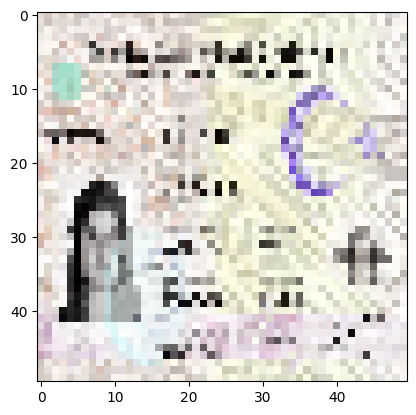

In [13]:
plt.imshow(training_data[3][0])

In [14]:
import random
random.shuffle(training_data)

In [15]:
x=[]
y=[]
for features, label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,IMG_SIZE, IMG_SIZE,3)

# Creation Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [17]:
x=x/255.0

y=np.array(y)

In [18]:
model=Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.fit(x, y, batch_size=4, epochs=12, validation_split=0.3)

Epoch 1/12
8/8 [==============================] - 1s 35ms/step - loss: 2.0839 - accuracy: 0.2812 - val_loss: -1.3102 - val_accuracy: 0.1333
Epoch 2/12
8/8 [==============================] - 0s 20ms/step - loss: 0.4665 - accuracy: 0.1562 - val_loss: 0.3959 - val_accuracy: 0.1333
Epoch 3/12
8/8 [==============================] - 0s 20ms/step - loss: 0.4329 - accuracy: 0.1562 - val_loss: -0.4704 - val_accuracy: 0.1333
Epoch 4/12
8/8 [==============================] - 0s 19ms/step - loss: 0.3428 - accuracy: 0.1562 - val_loss: -1.4458 - val_accuracy: 0.1333
Epoch 5/12
8/8 [==============================] - 0s 20ms/step - loss: 0.4139 - accuracy: 0.1562 - val_loss: -0.0769 - val_accuracy: 0.4000
Epoch 6/12
8/8 [==============================] - 0s 18ms/step - loss: 0.0718 - accuracy: 0.2500 - val_loss: -1.3037 - val_accuracy: 0.1333
Epoch 7/12
8/8 [==============================] - 0s 18ms/step - loss: -0.3297 - accuracy: 0.1562 - val_loss: -2.0850 - val_accuracy: 0.4000
Epoch 8/12
8/8 [====

In [20]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/halil.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 48ms/step
TCkimlik


In [21]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/metin.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 19ms/step
Metin


In [22]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/baran.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 17ms/step
TCkimlik


In [28]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/durmus.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 17ms/step
TCkimlik


In [29]:
from joblib import Parallel, delayed
import joblib
  
joblib.dump(model, 'models/model_39_rgb.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-12 13:19:27         3472
meta

['models/model_39_rgb.pkl']

In [41]:
model.fit(x, y, batch_size=4, epochs=20, validation_split=0.3)

Epoch 1/20
8/8 [==============================] - 0s 22ms/step - loss: -22.8603 - accuracy: 0.3438 - val_loss: -71.9452 - val_accuracy: 0.2000
Epoch 2/20
8/8 [==============================] - 0s 19ms/step - loss: -35.5412 - accuracy: 0.4062 - val_loss: -107.1191 - val_accuracy: 0.2000
Epoch 3/20
8/8 [==============================] - 0s 24ms/step - loss: -52.8826 - accuracy: 0.2188 - val_loss: -172.9804 - val_accuracy: 0.2000
Epoch 4/20
8/8 [==============================] - 0s 22ms/step - loss: -81.0146 - accuracy: 0.3438 - val_loss: -267.0805 - val_accuracy: 0.2000
Epoch 5/20
8/8 [==============================] - 0s 22ms/step - loss: -118.4241 - accuracy: 0.2500 - val_loss: -357.7925 - val_accuracy: 0.3333
Epoch 6/20
8/8 [==============================] - 0s 23ms/step - loss: -184.6280 - accuracy: 0.3125 - val_loss: -480.0752 - val_accuracy: 0.3333
Epoch 7/20
8/8 [==============================] - 0s 23ms/step - loss: -247.5286 - accuracy: 0.4062 - val_loss: -790.7849 - val_accurac

In [47]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/ali.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 27ms/step
Metin


In [30]:
model2=Sequential()
model2.add(Conv2D(64, (15,15), input_shape=x.shape[1:]))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (15,15)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(64))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model2.fit(x, y, batch_size=8, epochs=6, validation_split=0.3)

Epoch 1/6
4/4 [==============================] - 1s 92ms/step - loss: 6.8906 - accuracy: 0.0938 - val_loss: -3.7995 - val_accuracy: 0.1333
Epoch 2/6
4/4 [==============================] - 0s 52ms/step - loss: 0.7016 - accuracy: 0.1562 - val_loss: 0.5621 - val_accuracy: 0.1333
Epoch 3/6
4/4 [==============================] - 0s 50ms/step - loss: 0.6746 - accuracy: 0.1562 - val_loss: 0.6330 - val_accuracy: 0.1333
Epoch 4/6
4/4 [==============================] - 0s 49ms/step - loss: 0.6587 - accuracy: 0.1562 - val_loss: 0.5469 - val_accuracy: 0.1333
Epoch 5/6
4/4 [==============================] - 0s 50ms/step - loss: 0.5418 - accuracy: 0.1562 - val_loss: -0.2207 - val_accuracy: 0.1333
Epoch 6/6
4/4 [==============================] - 0s 49ms/step - loss: 0.3624 - accuracy: 0.1562 - val_loss: -0.8401 - val_accuracy: 0.1333


In [34]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=50
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model2.predict([prepare("img/halil.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 52ms/step
Metin
